# Augmentation

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from ssd.core.inference import toVisualizeRectangleRGBimg

# Geometric distortions

## Random Expand

[[ 28 125  88 195]]
(28, 125) (88, 195)


<IPython.core.display.Javascript object>


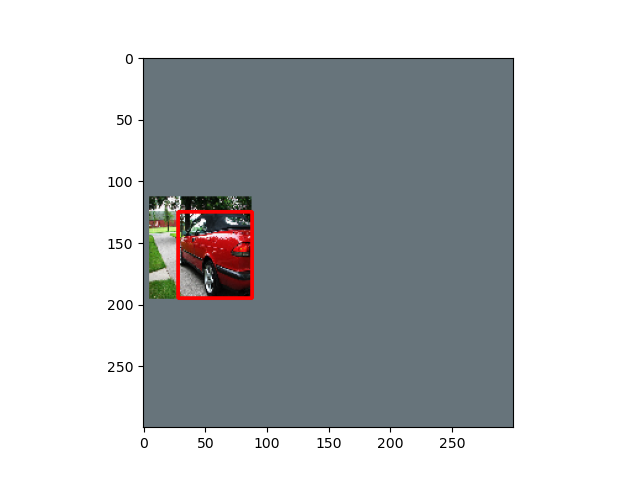

[[198  51 218  95]]
(198, 51) (218, 95)


<IPython.core.display.Javascript object>


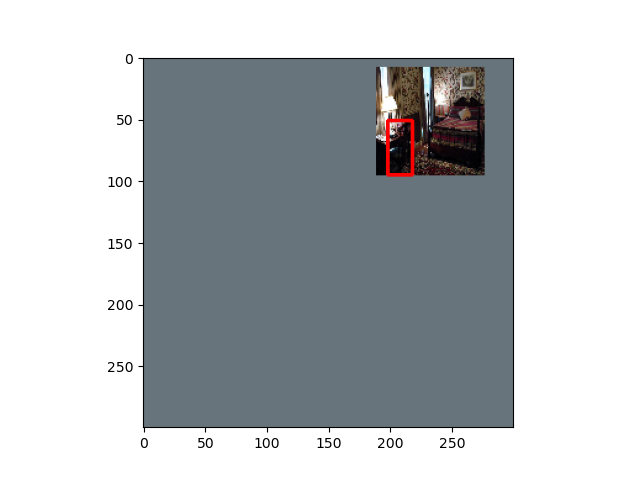

[[142 191 179 216]]
(142, 191) (179, 216)


<IPython.core.display.Javascript object>


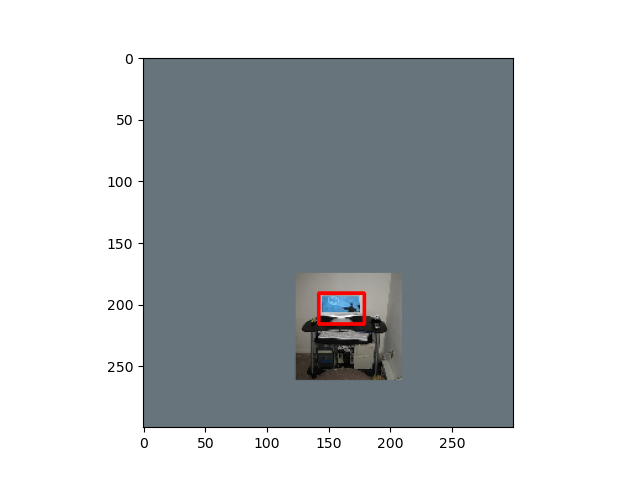

[[ 10  38 118  92]]
(10, 38) (118, 92)


<IPython.core.display.Javascript object>


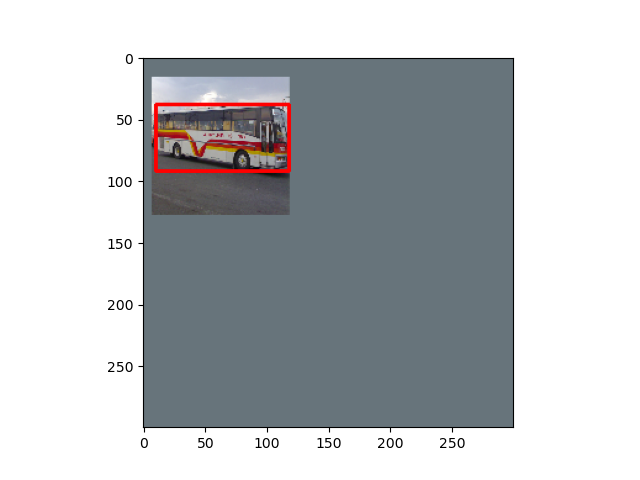

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb_mean=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[ 32  36 300 300]]
(32, 36) (300, 300)


<IPython.core.display.Javascript object>


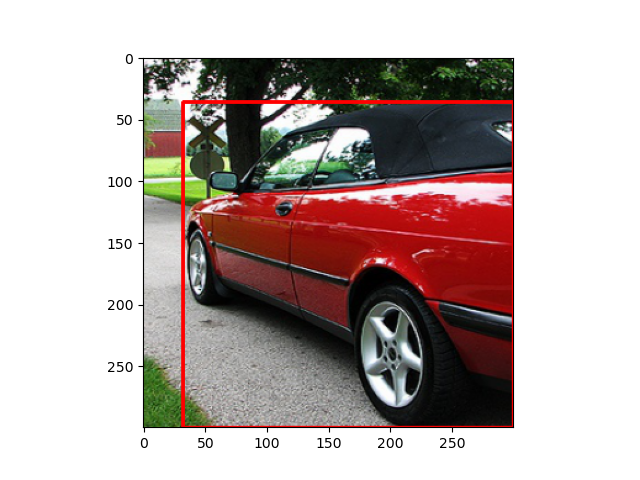

[[136 150 192 216]]
(136, 150) (192, 216)


<IPython.core.display.Javascript object>


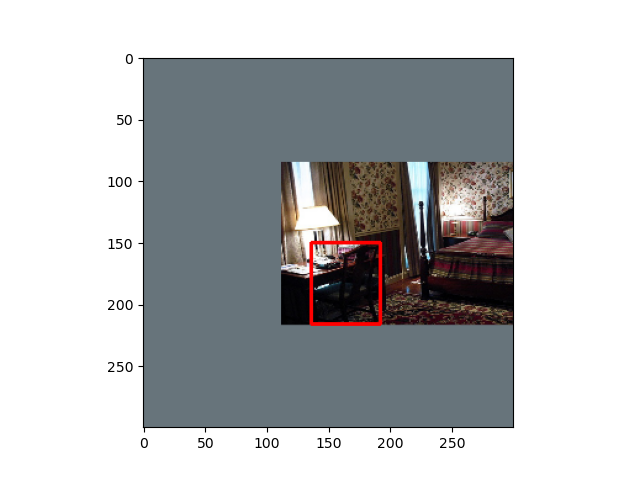

[[ 26   0 300 157]]
(26, 0) (300, 157)


<IPython.core.display.Javascript object>


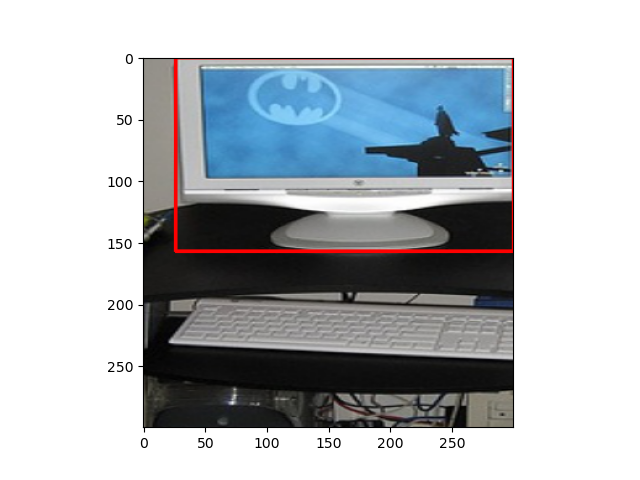

[[  0   0 300 169]]
(0, 0) (300, 169)


<IPython.core.display.Javascript object>


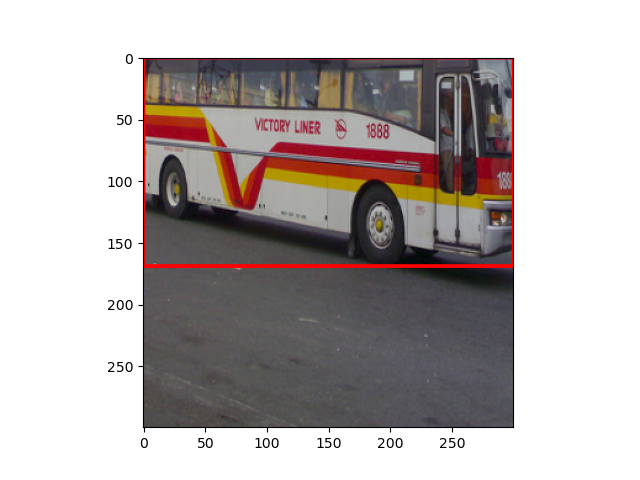

In [6]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[  0  45 215 297]]
(0, 45) (215, 297)


<IPython.core.display.Javascript object>


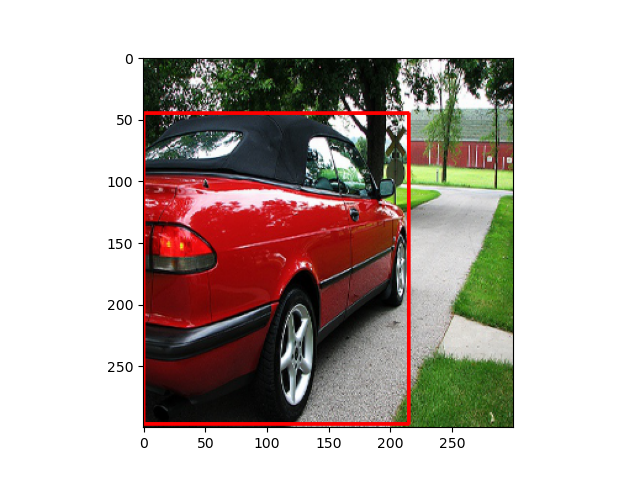

[[199 149 268 299]]
(199, 149) (268, 299)


<IPython.core.display.Javascript object>


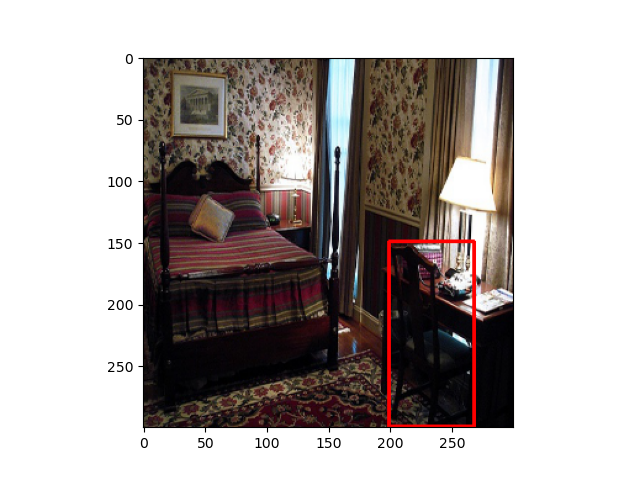

[[106  57 234 142]]
(106, 57) (234, 142)


<IPython.core.display.Javascript object>


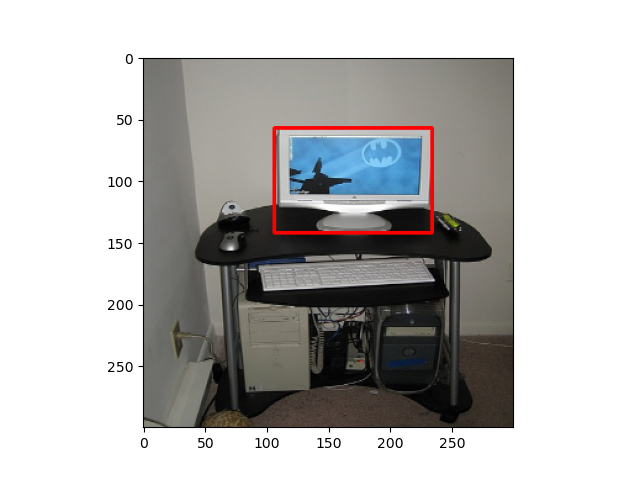

[[  0  58 291 205]]
(0, 58) (291, 205)


<IPython.core.display.Javascript object>


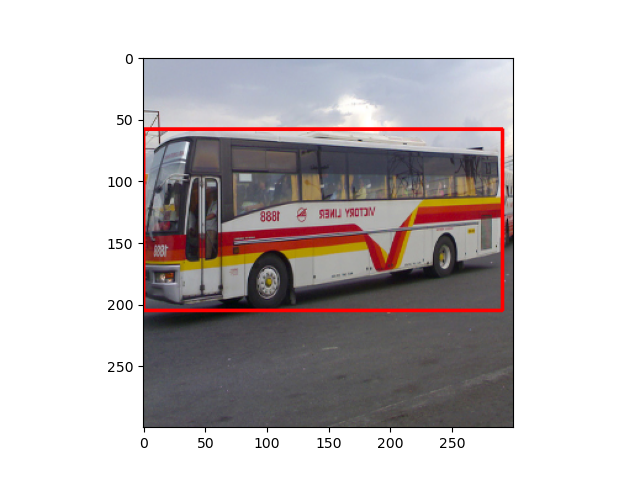

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)